# SVD

## Parte 1:

Nella prima parte di questo programma sarà necessario, dopo aver caricato i dati in un dataframe di pandas, creare una SVD.
Per poi concludere andando a determinare il numero di 'significant spectroscopic species'.

In [23]:
import pandas as pd
dft_cleaned= pd.read_csv('matrice_con_t.dat', header=None, sep=',')
dft_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,Wavelength,19.000000,22.000000,24.000000,26.000000,28.000000,30.000000,32.000000,34.000000,36.000000,...,82.000000,84.000000,86.000000,88.000000,90.000000,92.000000,94.000000,96.000000,98.000000,100.000000
1,330.0,0.535653,0.549668,0.547439,0.581914,0.563364,0.612426,0.496127,0.604874,0.598425,...,0.439534,0.435262,0.497140,0.479955,0.403012,0.441934,0.370971,0.431813,0.367093,0.432024
2,329.5,0.521705,0.556836,0.538156,0.581846,0.577134,0.607350,0.504032,0.585079,0.595223,...,0.473242,0.441320,0.474463,0.492177,0.403835,0.436586,0.383931,0.423019,0.348449,0.425564
3,329.0,0.531593,0.573395,0.517939,0.584496,0.570374,0.611856,0.501482,0.571400,0.591140,...,0.463936,0.429568,0.478443,0.473265,0.405304,0.436242,0.364719,0.410306,0.356284,0.414526
4,328.5,0.539488,0.584016,0.546564,0.594529,0.561401,0.623771,0.517139,0.549172,0.574798,...,0.467257,0.436169,0.477730,0.475877,0.389666,0.418678,0.353156,0.410643,0.332987,0.394576


In [24]:
df = dft_cleaned.drop(dft_cleaned.columns[0], axis=1)  # drop prima colonna
df = df.drop([0])                # drop prima riga
df = df.replace(',', '.', regex=True) # sostituisci virgole
df = df.reset_index(drop=True)        # resetta indice pulito

df.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
0,0.535653,0.549668,0.547439,0.581914,0.563364,0.612426,0.496127,0.604874,0.598425,0.509833,...,0.439534,0.435262,0.497140,0.479955,0.403012,0.441934,0.370971,0.431813,0.367093,0.432024
1,0.521705,0.556836,0.538156,0.581846,0.577134,0.607350,0.504032,0.585079,0.595223,0.509878,...,0.473242,0.441320,0.474463,0.492177,0.403835,0.436586,0.383931,0.423019,0.348449,0.425564
2,0.531593,0.573395,0.517939,0.584496,0.570374,0.611856,0.501482,0.571400,0.591140,0.521280,...,0.463936,0.429568,0.478443,0.473265,0.405304,0.436242,0.364719,0.410306,0.356284,0.414526
3,0.539488,0.584016,0.546564,0.594529,0.561401,0.623771,0.517139,0.549172,0.574798,0.541743,...,0.467257,0.436169,0.477730,0.475877,0.389666,0.418678,0.353156,0.410643,0.332987,0.394576
4,0.528820,0.608973,0.553635,0.608059,0.540713,0.627271,0.533439,0.553204,0.591127,0.535406,...,0.445359,0.445292,0.457624,0.499279,0.375435,0.408440,0.360081,0.405945,0.317857,0.382177


In [25]:
import os
if not os.path.exists("dati_puliti.csv"):
    df.to_csv("dati_puliti.csv", sep='\t', index=False, header=False)

Ora occorre fare una decomposizione matriciale SVD;
questa è una tecnica che permette di riscrivere la matrice D dei dati (dataset) come prodotto di 3 matrici:

$$D = U \cdot \Sigma \cdot V^T$$

- U contiene i cosìdetti spettri base (componenti);
- $\Sigma$ è una matrice diagonale che che contiene i valori singolari (peso);
- V è la matrice che contiene l'ampiezza dei vettori in funzione della T;

Questa è una tecnica di riduzione dimensionale al fine di compressione dei dati ed eliminazione del rumore.

Si usa numpy in quanto sklearn dà problemi su due fronti: 
1) non permette di scrivere tutta la matrice ma solo una troncata (dovremmo conoscere a priori il numero di componenti principali);
2) non ti ridà i valori singolari (matrice S o $\Sigma$).

Il comando full_matrices= False viene usato solo per rispariamre costo computazionale altrimenti inutile.

In [26]:
import numpy as np

# Convert the dataframe to a numpy array with numeric values
D = df.replace(',', '.', regex=True).astype(float).values

# Perform SVD
U, S, VT = np.linalg.svd(D, full_matrices=False)


Visualizzo lo spettro:

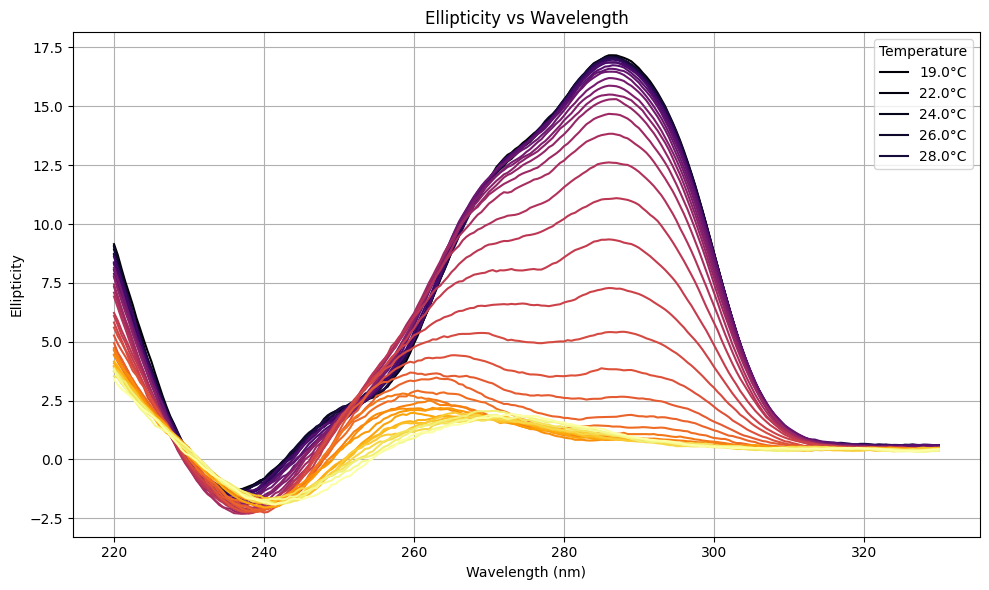

In [27]:
import matplotlib.pyplot as plt

# Pulizia dati
dft_cleaned = dft_cleaned.replace(',', '.', regex=True)
dft_cleaned = dft_cleaned.apply(pd.to_numeric, errors='coerce')

# Estrazione wavelength e spettri
wl = dft_cleaned.iloc[1:, 0].values
spectra = dft_cleaned.iloc[1:, 1:]

# Etichette per le colonne (temperature)
labels = dft_cleaned.iloc[0, 1:spectra.shape[1] + 1].astype(str) + "°C"
spectra.columns = labels
spectra.index = wl

# Plot
ax = spectra.plot(figsize=(10, 6), cmap='inferno')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Ellipticity')
plt.title('Ellipticity vs Wavelength')
plt.grid(True)

# Legenda parziale
handles, legend_labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], legend_labels[:5], title="Temperature", loc='upper right')

plt.tight_layout()
plt.show()



Prima di studiare il numero significativo si dà un'occhiata alle componenti dei vettori base per la loro magnetudine in funzione chiaramente di lambda e poi dei vettori ampiezza in funzione di T.
U*S vanno ad approssimare (se sommati e alcune volte ruotati) la matrice D di partenza mentre V in funzione di T mostra il peso relativo di ciascuna componente ad una determinata T.

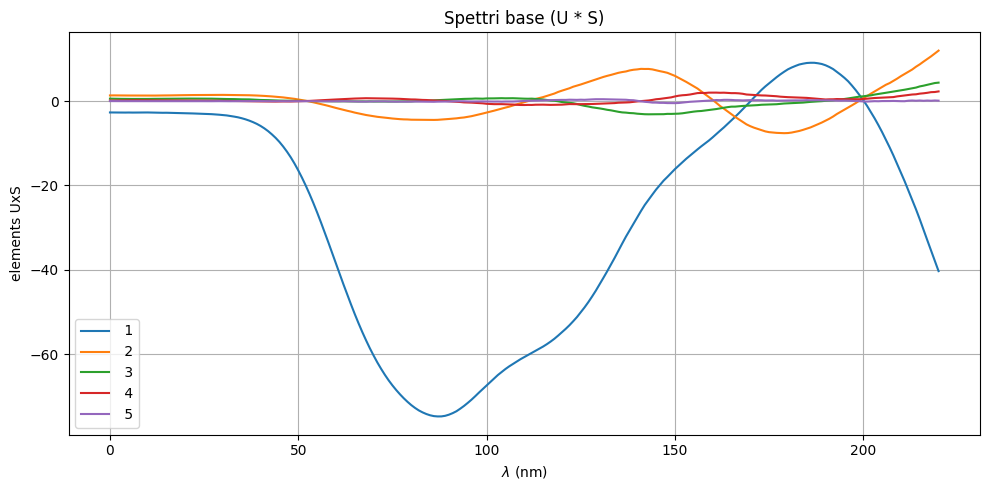

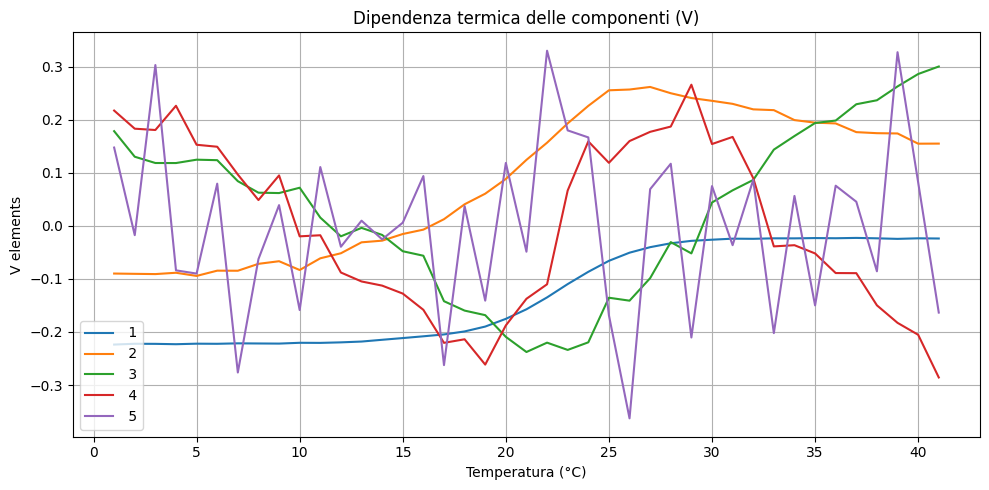

In [28]:
wavelengths = df.index     # l’asse X per gli spettri
temperatures = df.columns # l’asse X per VT

# Plot degli "spettri base" (U * S) in funzione di lambda ti serve x bvedere le componenti che contribuiscono allo spettro tot
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(wavelengths, U[:, i] * S[i], label=f" {i+1}") # Il ciclo for plotta i primi 5 spettri base pesati
plt.xlabel(r"$\lambda$ (nm)")
plt.ylabel("elements UxS")
plt.title("Spettri base (U * S)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot della dipendenza termica (V) in funzione di temperatura ti serve x vedere le componenti che contribuiscono alla dipendenza termica
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(temperatures, VT[i, :], label=f" {i+1}")
plt.xlabel("Temperatura (°C)")
plt.ylabel("V elements")
plt.title("Dipendenza termica delle componenti (V)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Numero significativo di componenti
Ora è importante capire come le diverse componenti di U (i vettori base) contribuiscono alla varianza spiegata.
Vengono plottati quindi gli scree plot (a barre) dei valori singolari e della percentuale di varianza.
Questo ci dà una stima qualitativa del numero di componenti significative grazie all' 'elbow method'.
Si usa una scala logaritmica per evidenziare in maniera migliore i piccoli valori di percentuale di varianza.

Per la varianza spiegata si è usata la seguente formula:

$$ \frac{S^2}{n-1} $$
- con n= numero di osservazioni.

Poi semplicemente viene normalizzata alla varianza spiegata totale per trovare la percentuale.

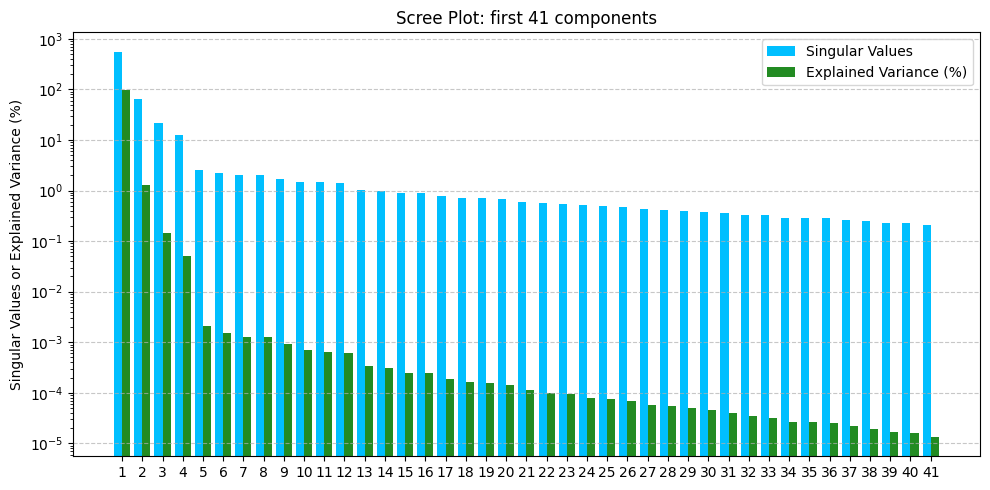

In [29]:
n_samples = D.shape[0]
explained_variance = (S**2) / (n_samples - 1)
explained_variance_ratio = explained_variance / explained_variance.sum() * 100

def plot_scree(S, explained_variance_ratio, num_componenti=10):
    componenti = np.arange(1, num_componenti + 1)

    fig, ax = plt.subplots(figsize=(10, 5))

    width = 0.4
    ax.bar(componenti - width/2, S[:num_componenti], width=width, color='deepskyblue', label='Singular Values')
    ax.bar(componenti + width/2, explained_variance_ratio[:num_componenti], width=width, color='forestgreen', label='Explained Variance (%)')
    ax.set_yscale('log')
    ax.set_ylabel('Singular Values or Explained Variance (%)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(componenti)

    plt.legend(loc='upper right')
    plt.title(f"Scree Plot: first {num_componenti} components")
    plt.tight_layout()
    plt.show()

plot_scree(S, explained_variance_ratio, num_componenti=len(S))


Da qui è chiaro che dalla decima circa componente in poi il contributo è trascurabile.

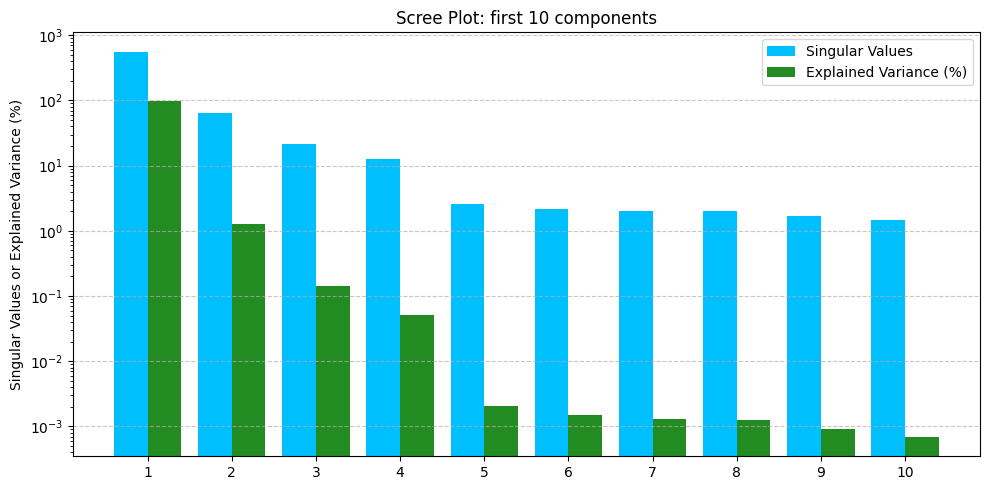

In [30]:
plot_scree(S, explained_variance_ratio, num_componenti=10)

Da questa prima analisi qualitativa è certo che dopo la componente 3, le altre posso essere trascurate.

Ora per essere sicuri della trattazione che stiamo effettuando è necessario andare a confrontare questo risultato con uno studio di autocorrelazione dei valori assunti da U e V al variare del numero di componenti significative.

$$\text{Autocorrelazione} = \frac{\sum_{i=1}^{n-1} (x_i - \bar{x})(x_{i+1} - \bar{x})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

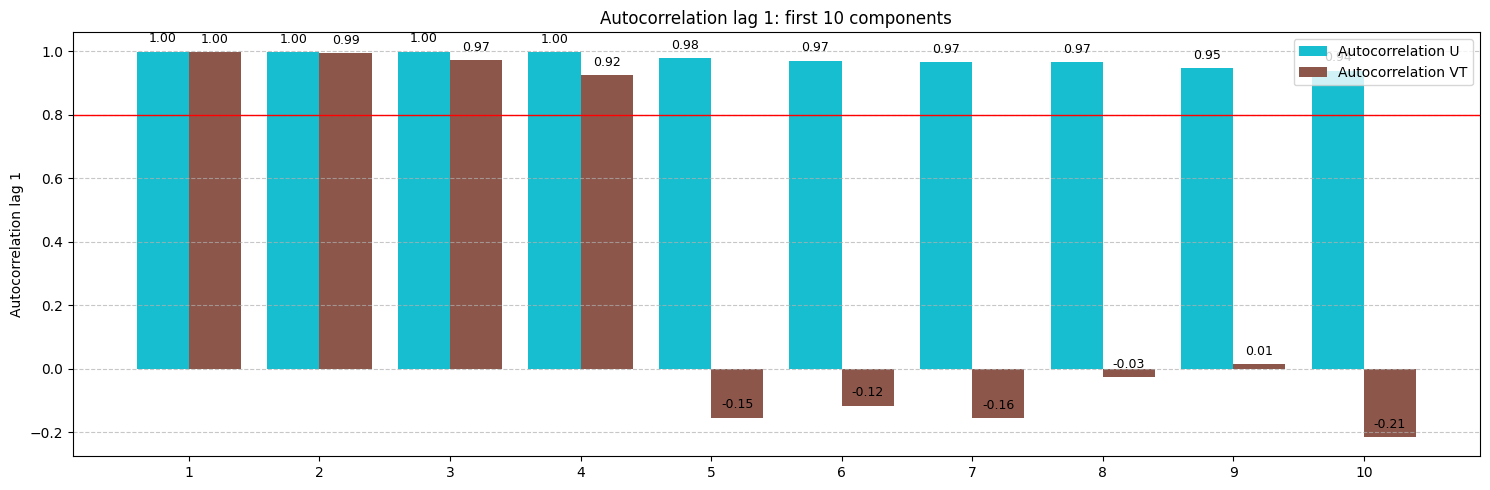

In [31]:
def autocorrelation_lag1(x):
    x = x - np.mean(x)
    return np.corrcoef(x[:-1], x[1:])[0, 1] # Restituisce solo il primo valore della matrice di correlazione

# Calcola autocorrelazione per ciascuna componente
autocorr_valuesVT = [autocorrelation_lag1(VT[i, :]) for i in range(VT.shape[0])] # Calcolo l'autocorrelazione per ogni riga di VT
autocorr_valuesU = [autocorrelation_lag1(U[:, i]) for i in range(U.shape[1])] # Calcolo l'autocorrelazione per ogni colonna di U

def autocorr_plot(autocorr_valuesU, autocorr_valuesVT, num_comp=10):
    comp = np.arange(1, num_comp + 1)
    
    fig, ax = plt.subplots(figsize=(15, 5))

    # Barre affiancate
    width = 0.4
    barsU = ax.bar(comp - width/2, autocorr_valuesU[:num_comp], width=width, color='tab:cyan', label='Autocorrelation U')
    barsVT = ax.bar(comp + width/2, autocorr_valuesVT[:num_comp], width=width, color='tab:brown', label='Autocorrelation VT')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.axhline(0.8, color='red', linestyle='-', linewidth=1)

    # Etichette
    ax.set_ylabel('Autocorrelation lag 1')
    ax.set_xticks(comp)
    ax.set_title(f"Autocorrelation lag 1: first {num_comp} components")

    # Valori sopra le barre
    for bar in barsU:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    for bar in barsVT:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    # Legenda
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

autocorr_plot(autocorr_valuesU, autocorr_valuesVT, num_comp=10)